# **Introduction**

Neural networks can be a difficult concept to understand. I think it’s mainly because they can be used for so many different things like classification, identification or just regression. In this article, I will walk you through how to set up a simple way to forecast time series with LSTM model.

# **What is Time Series Forecasting?**

Time series forecasting is a technique for predicting events through a time sequence. The technique is used in many fields of study, from geology to behaviour to economics. Techniques predict future events by analyzing trends from the past, assuming that future trends will hold similar to historical trends.

# **What is LSTM?**

LSTM stands for Short Term Long Term Memory. It is a model or an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have “short-term memory” in that they use persistent past information for use in the current neural network. Essentially, the previous information is used in the current task. This means that we do not have a list of all of the previous information available for the neural node.

I hope you have understood what time series forecasting means and what are LSTM models. Now I will be heading towards creating a machine learning model to forecast time series with LSTM in Machine Learning.

For this task to forecast time series with LSTM, I will start by importing all the necessary packages we need:

# **importing all the necessary packages**

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

# **Load Dataset**

Now let’s load the data, and prepare the data so that we can use it on the LSTM model, you can download the dataset I am using in this task from here:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
dataframe = pandas.read_csv('/content/drive/MyDrive/Datasets/Airline/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Now, I will split the data into training sets and test sets:



In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# **Time Series with LSTM**


Now before training the data on the LSTM model, we need to prepare the data so that we can fit it on the model, for this task I will define a helper function:

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Now, we need to reshape the data before applying it into the LSTM model:



In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Now as all the tasks are completed concerning data preparation to fit into the LSTM model, it time to fit the data on the model and let’s train the model:

In [7]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0469
Epoch 2/100
94/94 - 0s - loss: 0.0224
Epoch 3/100
94/94 - 0s - loss: 0.0162
Epoch 4/100
94/94 - 0s - loss: 0.0146
Epoch 5/100
94/94 - 0s - loss: 0.0137
Epoch 6/100
94/94 - 0s - loss: 0.0127
Epoch 7/100
94/94 - 0s - loss: 0.0117
Epoch 8/100
94/94 - 0s - loss: 0.0108
Epoch 9/100
94/94 - 0s - loss: 0.0099
Epoch 10/100
94/94 - 0s - loss: 0.0090
Epoch 11/100
94/94 - 0s - loss: 0.0081
Epoch 12/100
94/94 - 0s - loss: 0.0073
Epoch 13/100
94/94 - 0s - loss: 0.0064
Epoch 14/100
94/94 - 0s - loss: 0.0056
Epoch 15/100
94/94 - 0s - loss: 0.0049
Epoch 16/100
94/94 - 0s - loss: 0.0043
Epoch 17/100
94/94 - 0s - loss: 0.0038
Epoch 18/100
94/94 - 0s - loss: 0.0033
Epoch 19/100
94/94 - 0s - loss: 0.0030
Epoch 20/100
94/94 - 0s - loss: 0.0027
Epoch 21/100
94/94 - 0s - loss: 0.0024
Epoch 22/100
94/94 - 0s - loss: 0.0024
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

Now, let’s make predictions and visualize the time series trends by using the matplotlib package in python:

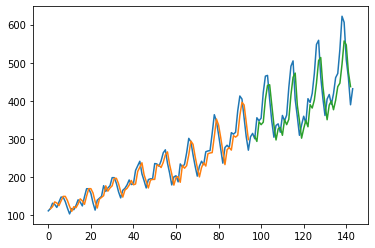

In [8]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **References**

[Time Series with LSTM in Machine Learning](https://thecleverprogrammer.com/2020/08/29/time-series-with-lstm-in-machine-learning/)